In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
file_path = r"\Datasets\Historical_Stock_Data.xlsx"

df = pd.read_excel(file_path, sheet_name=2)  

df.head()


,Price,Close,High,Low,Open,Volume,Ticker,Company Name
0,2021-01-04,159.331497,163.600006,157.201004,163.500000,88228000,AMZN,AMAZON
1,2021-01-05,160.925507,161.169006,158.253006,158.300507,53110000,AMZN,AMAZON
2,2021-01-06,156.919006,159.875504,156.557999,157.324005,87896000,AMZN,AMAZON
3,2021-01-07,158.108002,160.427002,157.750000,157.850006,70290000,AMZN,AMAZON
4,2021-01-08,159.134995,159.531998,157.110001,159.000000,70754000,AMZN,AMAZON


In [4]:
df.describe()

,Price,Close,High,Low,Open,Volume
count,753,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,2022-07-01 22:30:07.171314688,138.282507,140.105381,136.473004,138.332102,6.757041e+07
min,2021-01-04 00:00:00,81.820000,83.480003,81.430000,82.800003,2.237840e+07
25%,2021-10-01 00:00:00,115.010002,116.919998,113.150002,114.790001,5.001730e+07
50%,2022-07-01 00:00:00,140.389999,143.320007,138.929504,140.800003,6.093400e+07
75%,2023-03-31 00:00:00,163.408005,165.180496,161.813995,163.729507,7.558400e+07
max,2023-12-29 00:00:00,186.570496,188.654007,184.839493,187.199997,2.726620e+08
std,NaN,27.465044,27.506779,27.489050,27.517048,2.762350e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Price         753 non-null    datetime64[ns]
 1   Close         753 non-null    float64       
 2   High          753 non-null    float64       
 3   Low           753 non-null    float64       
 4   Open          753 non-null    float64       
 5   Volume        753 non-null    int64         
 6   Ticker        753 non-null    object        
 7   Company Name  753 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 47.2+ KB


In [6]:
df.rename(columns={'Price': 'Date'}, inplace=True)

In [7]:
df.head()

,Date,Close,High,Low,Open,Volume,Ticker,Company Name
0,2021-01-04,159.331497,163.600006,157.201004,163.500000,88228000,AMZN,AMAZON
1,2021-01-05,160.925507,161.169006,158.253006,158.300507,53110000,AMZN,AMAZON
2,2021-01-06,156.919006,159.875504,156.557999,157.324005,87896000,AMZN,AMAZON
3,2021-01-07,158.108002,160.427002,157.750000,157.850006,70290000,AMZN,AMAZON
4,2021-01-08,159.134995,159.531998,157.110001,159.000000,70754000,AMZN,AMAZON


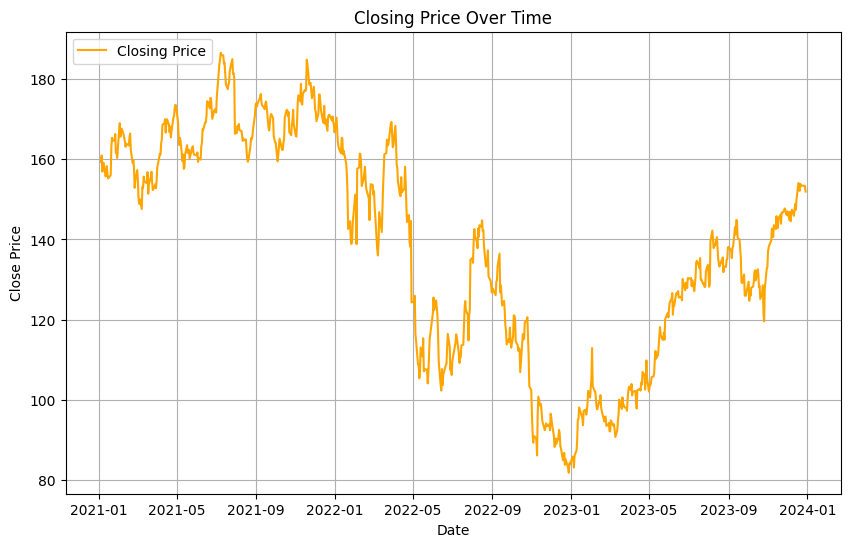

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='orange')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Closing Price Over Time')
plt.legend(loc="upper left")
plt.grid(True)

plt.show()


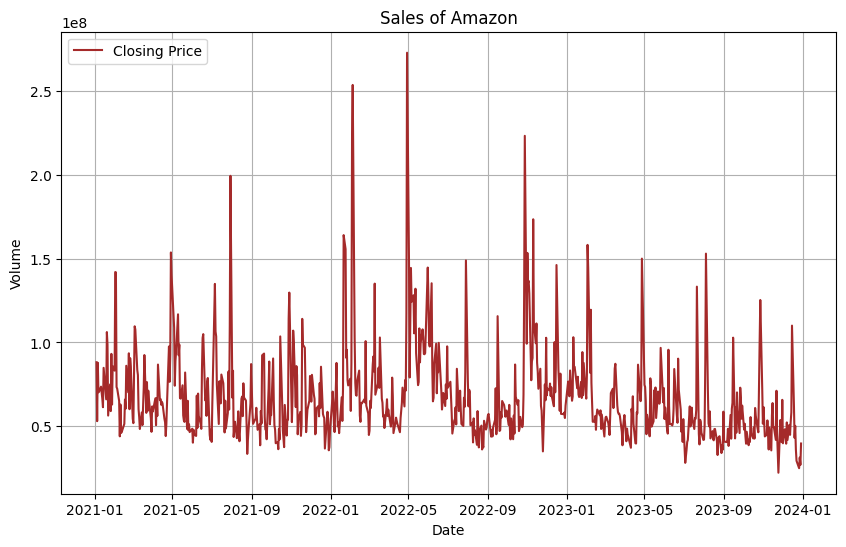

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label="Closing Price", color='Brown')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Sales of Amazon')
plt.legend(loc="upper left")
plt.grid(True)

plt.show()

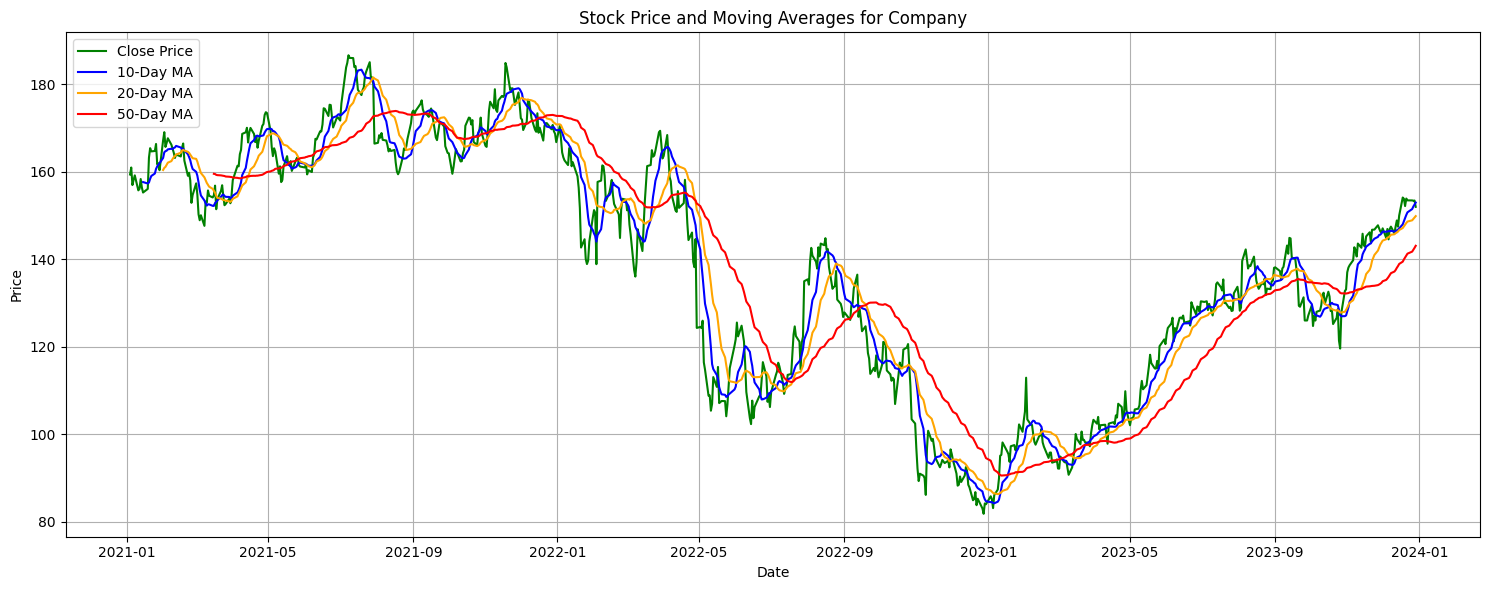

In [11]:
import matplotlib.pyplot as plt


company_data = df.copy()  

company_data['10-Day MA'] = company_data['Close'].rolling(window=10).mean()
company_data['20-Day MA'] = company_data['Close'].rolling(window=20).mean()
company_data['50-Day MA'] = company_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(15, 6))
plt.plot(company_data['Date'], company_data['Close'], label="Close Price", color='green')
plt.plot(company_data['Date'], company_data['10-Day MA'], label="10-Day MA", color='blue')
plt.plot(company_data['Date'], company_data['20-Day MA'], label="20-Day MA", color='orange')
plt.plot(company_data['Date'], company_data['50-Day MA'], label="50-Day MA", color='red')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Price and Moving Averages for Company')
plt.legend(loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()


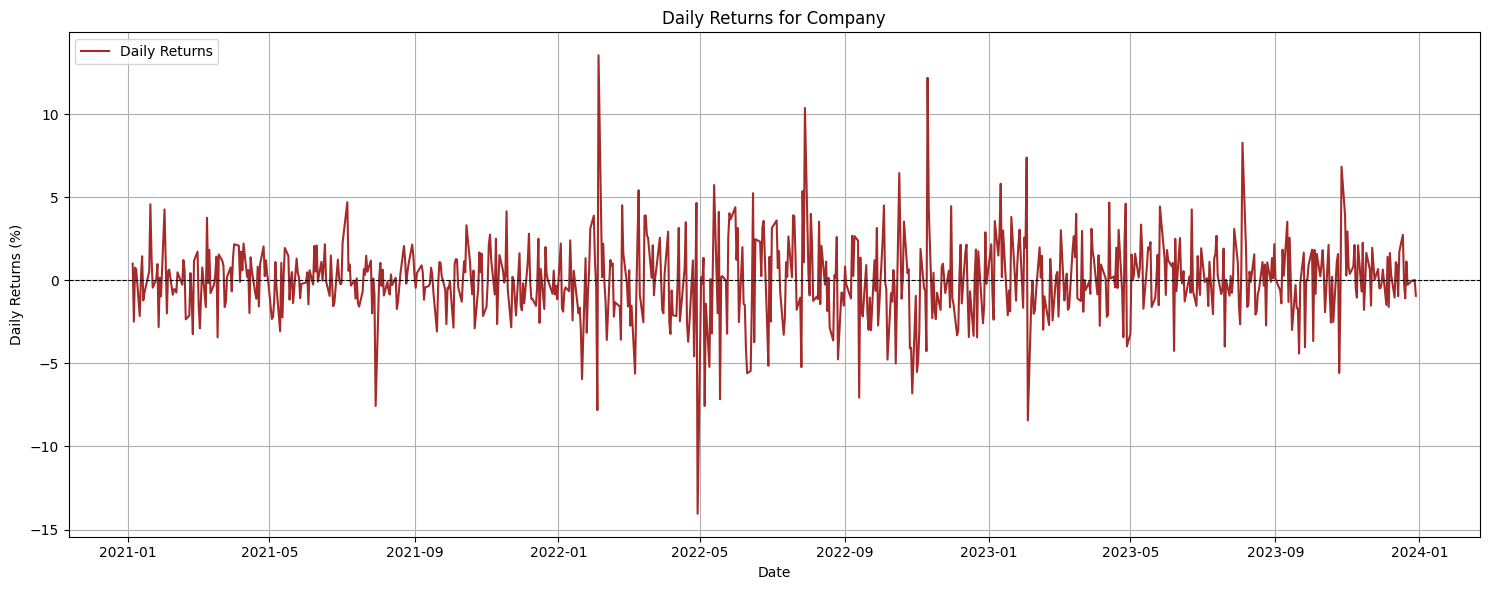

In [12]:
import matplotlib.pyplot as plt


df['Daily Returns'] = df['Close'].pct_change() * 100  

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Daily Returns'], label="Daily Returns", color='brown')

# Add labels and title
plt.ylabel('Daily Returns (%)')
plt.xlabel('Date')
plt.title('Daily Returns for Company')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  
plt.legend(loc="upper left")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


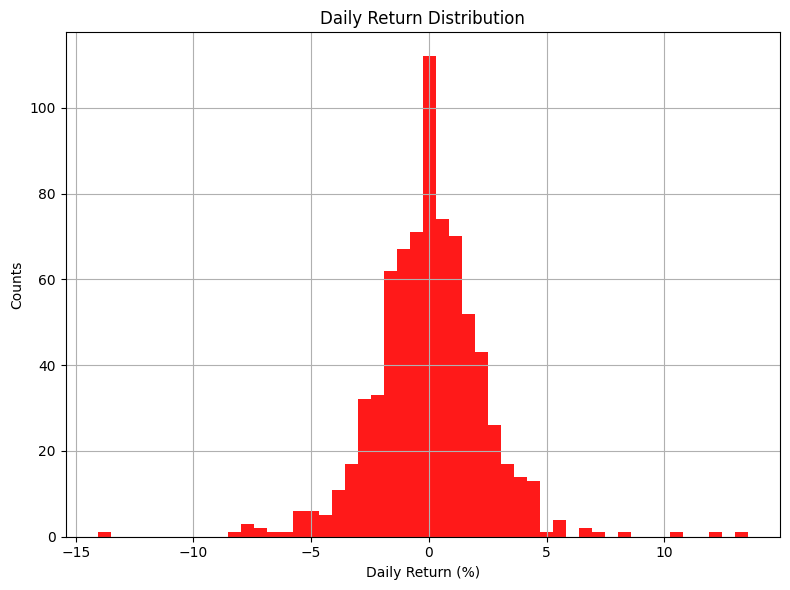

In [13]:
plt.figure(figsize=(8, 6))

company_data = df.copy()

company_data['Daily Return'] = company_data['Close'].pct_change() * 100

company_data['Daily Return'].hist(bins=50, color='red', alpha=0.9)

plt.xlabel('Daily Return (%)')
plt.ylabel('Counts')
plt.title(f'Daily Return Distribution')

plt.tight_layout()
plt.show()


In [14]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

716

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:5]

array([[0.73996306],
       [0.75518026],
       [0.71693223],
       [0.72828297],
       [0.73808715]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.73996306, 0.75518026, 0.71693223, 0.72828297, 0.73808715,
       0.70539518, 0.70855516, 0.73006332, 0.7117246 , 0.70064102,
       0.70852165, 0.77659782, 0.79741391, 0.79036854, 0.79121341,
       0.80654992, 0.76189614, 0.76430184, 0.74930431, 0.81454505,
       0.83226337, 0.80005822, 0.80887448, 0.81896986, 0.80502725,
       0.79646401, 0.78767164, 0.77600116, 0.7834378 , 0.7792564 ,
       0.79820154, 0.80755226, 0.77016337, 0.73715167, 0.74371969,
       0.7270276 , 0.67816387, 0.69523776, 0.72063627, 0.6960015 ,
       0.6532666 , 0.64017353, 0.6510995 , 0.62794456, 0.68087985,
       0.67839301, 0.70509933, 0.69359579, 0.68986786, 0.69472705,
       0.71566725, 0.66424035, 0.68666025, 0.70380099, 0.71651212,
       0.69244064, 0.67296105, 0.67571519, 0.68702777, 0.67727122])]
[0.6957866349227089]

[array([0.73996306, 0.75518026, 0.71693223, 0.72828297, 0.73808715,
       0.70539518, 0.70855516, 0.73006332, 0.7117246 , 0.70064102,
       0.70852165, 0.77659782, 0.797

In [17]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
656/656 [==============================] - 40s 50ms/step - loss: 0.0076
Epoch 2/5
656/656 [==============================] - 32s 48ms/step - loss: 0.0025
Epoch 3/5
656/656 [==============================] - 31s 47ms/step - loss: 0.0022
Epoch 4/5
656/656 [==============================] - 31s 47ms/step - loss: 0.0017
Epoch 5/5
656/656 [==============================] - 33s 50ms/step - loss: 0.0017


In [18]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 2s 32ms/step


1.8604056129267246

Index(['Close'], dtype='object')


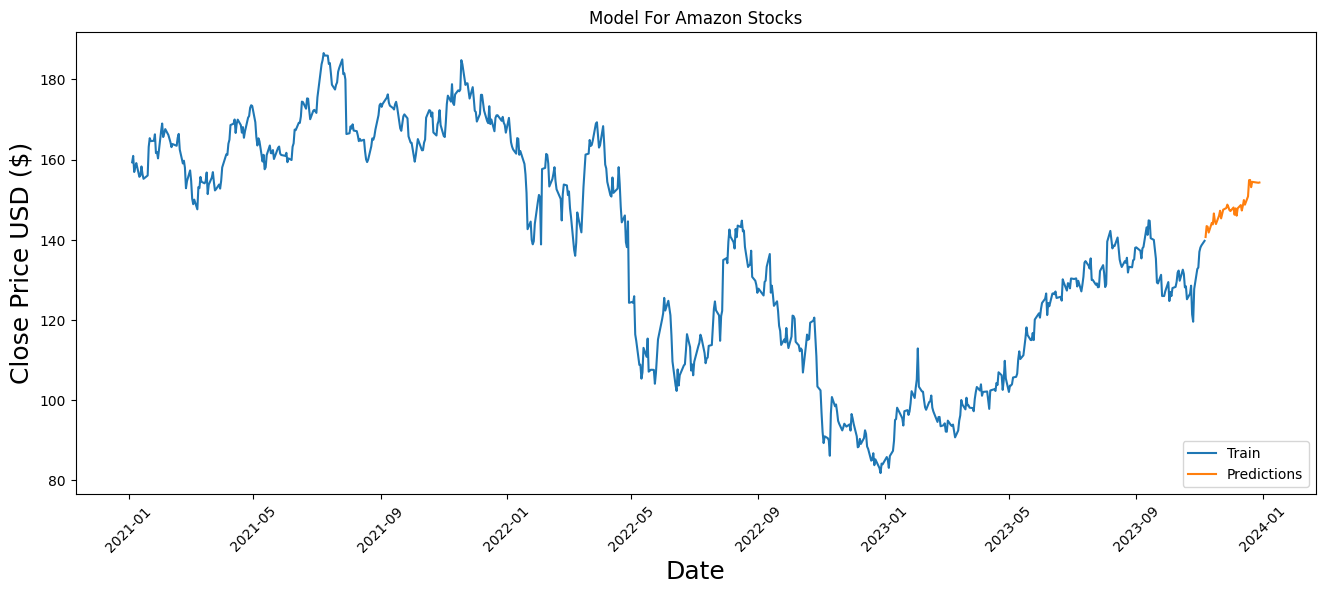

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

print(data.columns)

train = data[:training_data_len]
valid = data[training_data_len:]

train_dates = df['Date'][:training_data_len]
valid_dates = df['Date'][training_data_len:]

valid.loc[:, 'Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Model For Amazon Stocks')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train_dates, train['Close'], label='Train')
plt.plot(valid_dates, valid['Predictions'], label='Predictions')

plt.legend(loc='lower right')

plt.xticks(rotation=45)

plt.show()
